# Exercício

O código abaixo **contém erros**. Descubra-os e corrija-os de modo à função valor possuir os valores corretos:
 
```python
+0.812   +0.868 +0.918 +1.000 

+0.762          +0.660 -1.000 

+0.705** +0.655 +0.611 +0.388** 
    a       d      f      i
```

Erro 1: print no final do código!!

Erro 2:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#ações
A = [0,1,2,3]
subir,descer,esquerda,direita = A
numAcoes = len(A)

In [3]:
#estados [coluna, linha]
S = np.array([[1,1],[1,2],[1,3],[2,1],[2,3],[3,1],[3,2],[3,3],[4,1],[4,2],[4,3]],dtype = np.int16)

numEstados = S.shape[0]

a,b,c,d,e,f,g,h,i,j,k = list(range(numEstados))

In [9]:
#modelo de transição
P = np.zeros((numEstados, numEstados, numAcoes))
    
#s = a
P[b,a,subir] = .8
P[d,a,subir] = .1
P[a,a,subir] = .1

P[a,a,descer] = .9
P[d,a,descer] = .1

P[a,a,esquerda] = .9
P[b,a,esquerda] = .1

P[d,a,direita] = .8
P[b,a,direita] = .1
P[a,a,direita] = .1

#b
P[c,b,subir] = .8
P[b,b,subir] = .2

P[a,b,descer] = .8
P[b,b,descer] = .2

P[b,b,esquerda] = .8
P[c,b,esquerda] = .1
P[a,b,esquerda] = .1

P[b,b,direita] = .8
P[c,b,direita] = .1
P[a,b,direita] = .1

#c
P[c,c,subir] = .9
P[e,c,subir] = .1

P[b,c,descer] = .8
P[c,c,descer] = .1
P[e,c,descer] = .1

P[c,c,esquerda] = .9
P[b,c,esquerda] = .1

P[e,c,direita] = .8
P[c,c,direita] = .1
P[b,c,direita] = .1

#d
P[d,d,subir] = .8
P[a,d,subir] = .1
P[f,d,subir] = .1

P[d,d,descer] = .8
P[a,d,descer] = .1
P[f,d,descer] = .1

P[a,d,esquerda] = .8
P[d,d,esquerda] = .2

P[f,d,direita] = .8
P[d,d,direita] = .2

#e
P[e,e,subir] = .8
P[c,e,subir] = .1
P[h,e,subir] = .1

P[e,e,descer] = .8
P[c,e,descer] = .1
P[h,e,descer] = .1

P[c,e,esquerda] = .8
P[e,e,esquerda] = .2

P[h,e,direita] = .8
P[e,e,direita] = .2

#f
P[g,f,subir] = .8
P[d,f,subir] = .1
P[i,f,subir] = .1

P[f,f,descer] = .8
P[d,f,descer] = .1
P[i,f,descer] = .1

P[d,f,esquerda] = .8
P[g,f,esquerda] = .1
P[f,f,esquerda] = .1

P[i,f,direita] = .8
P[g,f,direita] = .1
P[f,f,direita] = .1

#g
P[h,g,subir] = .8
P[g,g,subir] = .1
P[j,g,subir] = .1

P[f,g,descer] = .8
P[g,g,descer] = .1
P[j,g,descer] = .1

P[g,g,esquerda] = .8
P[h,g,esquerda] = .1
P[f,g,esquerda] = .1

P[j,g,direita] = .8
P[h,g,direita] = .1
P[f,g,direita] = .1

#h
P[h,h,subir] = .8
P[e,h,subir] = .1
P[k,h,subir] = .1

P[g,h,descer] = .8
P[e,h,descer] = .1
P[k,h,descer] = .1 

P[e,h,esquerda] = .8
P[h,h,esquerda] = .1
P[g,h,esquerda] = .1

P[k,h,direita] = .8
P[h,h,direita] = .1
P[g,h,direita] = .1

#i
P[j,i,subir] = .8
P[i,i,subir] = .1
P[f,i,subir] = .1

P[i,i,descer] = .9
P[f,i,descer] = .1

P[f,i,esquerda] = .8
P[j,i,esquerda] = .1
P[i,i,esquerda] = .1

P[f,i,direita] = .9
P[j,i,direita] = .1

In [10]:
#Recompensas

R = np.ones([numEstados,]) * -0.04
R[j] = -1
R[k] = 1

In [11]:
def ValueIteration(mdp):
    
    P = mdp['P']
    R = mdp['R']
    S = mdp['S']
    A = mdp['A']
    
    gamma = mdp['gamma']
    epsilon = mdp['epsilon']
    
    delta = 1e-20
    alpha = 1
    
    numEstados = S.shape[0]
    
    estados = list(range(numEstados)) 
        
    a,b,c,d,e,f,g,h,i,j,k = list(range(numEstados))
    
    V  = np.zeros([numEstados,])
    Vp = np.zeros([numEstados,])
    
    history = list()
    
    while True:
        
        V = np.copy(Vp)
    
        history.append(V)
        
        delta = 0.
        
        for s in estados:
            
            m = -1e30
            
            for a in A:                
                ma = 0
                for sp in estados:
                    ma = ma + P[sp,s,a] * V[sp]
                if ma > m:
                    m = ma
                    
            #print(m)
            # Vp[s] = R[s] + gamma * m
            Vp[s] = Vp[s] + alpha * (R[s] + gamma * m - Vp[s])
            #print(Vp[s],V[
            
            if abs(Vp[s]-V[s]) > delta:
                delta = abs(Vp[s]-V[s])
        
            #print(delta)
            
        if delta < epsilon * (1.-gamma)/gamma:
            break
    
    # primeiro erro aqui
    for n_loop in (c,e,h,k):
        print("%+.3f " % V[n_loop], end='')
    print("")
    print("")
    for n_loop in (b,-1,g,j):
        if n_loop > 0:
            print("%+.3f " % V[n_loop], end='')
        else:
            print("       ", end='')
    print("")
    print("")
    for n_loop in (a,d,f,i):
        print("%+.3f " % V[n_loop], end='')
        
    
    fig, ax = plt.subplots(figsize = (16,10))
    ax.plot(history)

    ax.set(xlabel='iterações', ylabel='valores de estimados',
       title='Valores dos estados método iterativo')
    ax.grid()

    #legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    
    plt.show()

        

In [12]:
mdp = {'P' : P, 'S' : S, 'R': R, 'A': A, 'gamma' : .999999 ,'epsilon' : 1e-20}

+0.812 +0.868 +0.918 +1.000 

+0.762        +0.660 -1.000 

+0.655 +0.655 +0.611 +0.410 

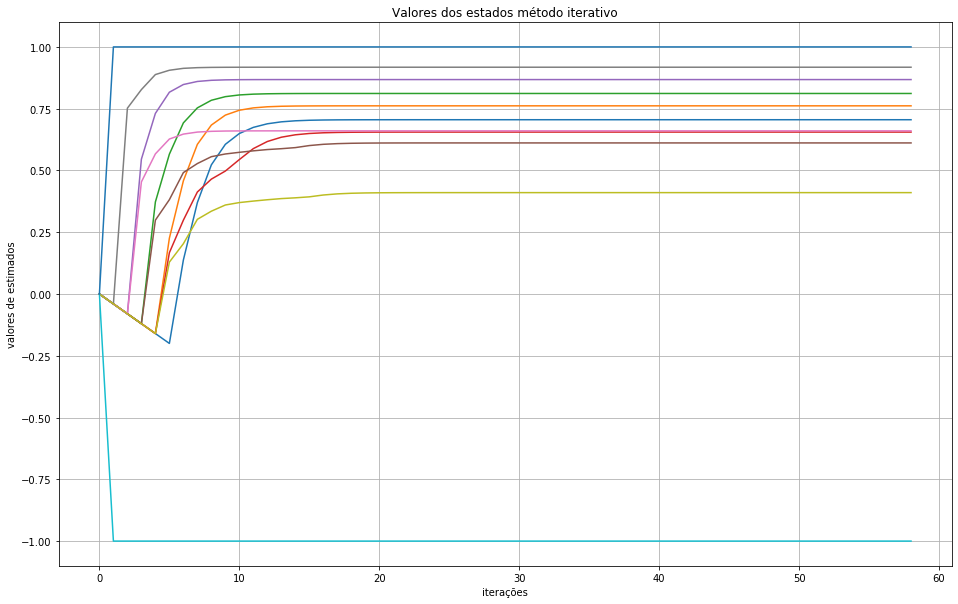

In [13]:
V = ValueIteration(mdp)